In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (Mac의 경우)
mpl.rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

## overfit??

✅ XGBoost 예측 결과 (2025년 5월, HIGH 대상)
RMSE: 109.38
MAE : 89.71
R2  : 0.9924


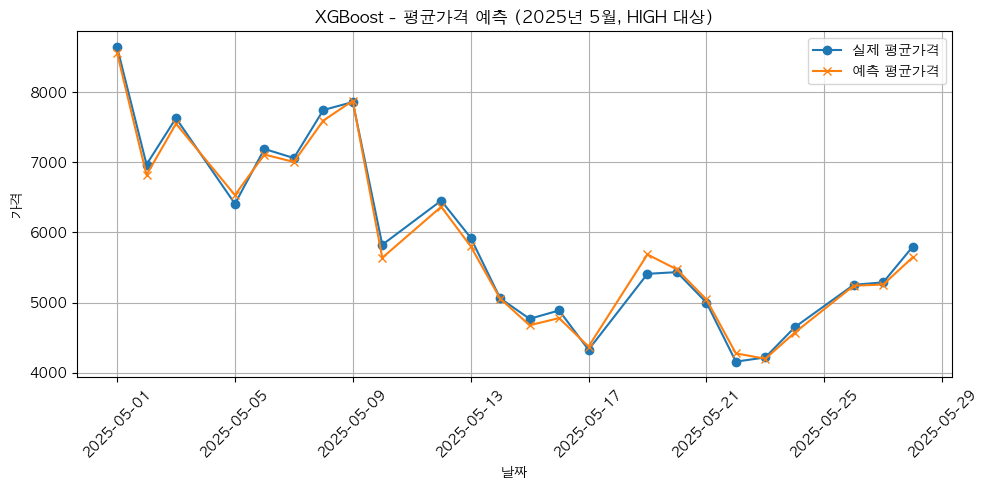

In [18]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("store/cabbage_separated.csv")
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date')

# 2. HIGH 등급만 사용
df = df[df['rate'] == 'HIGH'].copy()

# 3. 피처 엔지니어링: lag 및 변화율
df['avg_price_lag1'] = df['avg_price'].shift(1)
df['avg_price_lag7'] = df['avg_price'].shift(7)
df['price_diff'] = df['avg_price'] - df['avg_price_lag1']

# 4. 결측치 제거
df = df.dropna(subset=['avg_price', 'avg_price_lag1', 'avg_price_lag7', 'price_diff'])

# 5. 테스트셋 기간 정의 (2025년 5월)
target_start = pd.to_datetime("2025-05-01")
target_end = pd.to_datetime("2025-05-28")

test_df = df[(df["date"] >= target_start) & (df["date"] <= target_end)]
train_df = df[df["date"] < target_start]

# 6. 특성과 타겟 정의
feature_cols = ['intake', 'gap', 'avg_price_lag1', 'avg_price_lag7', 'price_diff']
target_col = 'avg_price'

X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_test = test_df[feature_cols]
y_test = test_df[target_col]

# 7. 모델 학습
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.16, random_state=42)
model.fit(X_train, y_train)

# 8. 예측
y_pred = model.predict(X_test)

# 9. 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ XGBoost 예측 결과 (2025년 5월, HIGH 대상)")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R2  : {r2:.4f}")

# 10. 시각화
plt.figure(figsize=(10, 5))
plt.plot(test_df["date"], y_test.values, label="실제 평균가격", marker='o')
plt.plot(test_df["date"], y_pred, label="예측 평균가격", marker='x')
plt.title("XGBoost - 평균가격 예측 (2025년 5월, HIGH 대상)")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/Users/iujung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/mc/npy4915s0gqclqt2wqx1vygm0000gn/T/ipykernel_86442/1250923233.py:37: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/Users/iujung/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


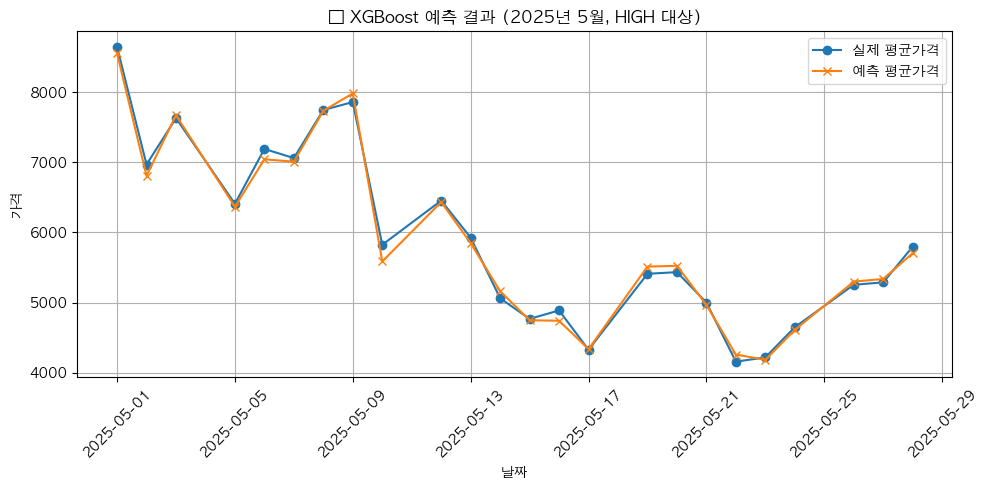

(95.438041718627, 77.80153401692708, 0.9941820969436422)

In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# feature 및 target 정의
feature_cols = ['avg_price_lag1', 'avg_price_lag7', 'price_diff', 'intake', 'gap']
target_col = 'avg_price'

X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_test = test_df[feature_cols]
y_test = test_df[target_col]

# XGBoost 학습
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 지표
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(test_df["date"], y_test.values, label="실제 평균가격", marker='o')
plt.plot(test_df["date"], y_pred, label="예측 평균가격", marker='x')
plt.title("✅ XGBoost 예측 결과 (2025년 5월, HIGH 대상)")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

rmse, mae, r2


/Users/iujung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/mc/npy4915s0gqclqt2wqx1vygm0000gn/T/ipykernel_86442/3968144222.py:53: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/Users/iujung/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


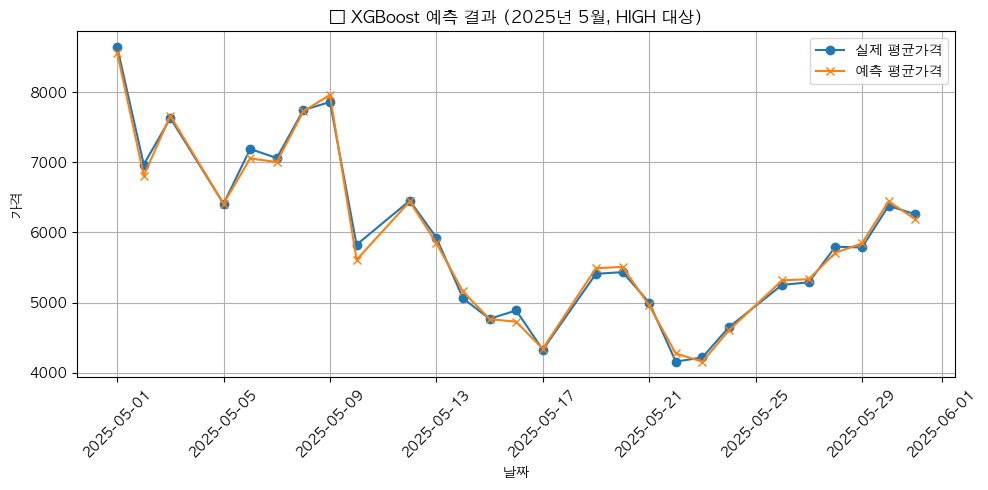

(88.64204221334523, 73.09933810763889, 0.9944037109195948)

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기 및 전처리
df = pd.read_csv("store/cabbage_separated.csv")
df = df[df["rate"] == "HIGH"].copy()
df["date"] = pd.to_datetime(df[["year", "month", "day"]])
df = df.sort_values("date")

# lag feature 생성
df["avg_price_lag1"] = df["avg_price"].shift(1)
df["avg_price_lag7"] = df["avg_price"].shift(7)
df["price_diff"] = df["avg_price"].diff()

# 결측치 제거
df = df.dropna().reset_index(drop=True)

# train/test 분리 (시계열 기준)
train_df = df[df["date"] < "2025-05-01"]
test_df = df[df["date"] >= "2025-05-01"]

# 학습/예측
feature_cols = ['avg_price_lag1', 'avg_price_lag7', 'price_diff', 'intake', 'gap']
target_col = 'avg_price'

X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_test = test_df[feature_cols]
y_test = test_df[target_col]

model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 평가
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(test_df["date"], y_test.values, label="실제 평균가격", marker='o')
plt.plot(test_df["date"], y_pred, label="예측 평균가격", marker='x')
plt.title("✅ XGBoost 예측 결과 (2025년 5월, HIGH 대상)")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

rmse, mae, r2
